# **Data Preprocessing for ML using Titanic Dataset**



##**Import requiered libraries**

In [117]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Laod Data set**

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [120]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


##***Handling Missing values***



**Drop Cabin Column(has many null values)**

In [122]:
df.drop(columns='Cabin', inplace=True)

In [123]:
print("\n After dropping Cabin Column")
df.isnull().sum()


 After dropping Cabin Column


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


**Fill `Age`, `Embarked`, `Fare` Columns**

In [124]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


handling missing value : less than 50%  


In [125]:

from sklearn.impute import KNNImputer


In [126]:
# Use KNN Imputer for Age and Fare
imputer = KNNImputer(n_neighbors=5)
df[['Fare']] = imputer.fit_transform(df[['Fare']])

In [127]:
print("\n After filling missing values")
df.isnull().sum()


 After filling missing values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [128]:
print("\n After filling missing values")
df.describe()


 After filling missing values


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,446.040704,0.387239,29.252200,0.522552,0.380638,31.431149
std,257.212740,0.487387,12.889112,1.098050,0.802185,46.331688
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.925000
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.500000
75%,669.000000,1.000000,35.000000,1.000000,0.000000,31.387500
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


##***Outlier Handling***

In [129]:
num_cols = ['Age']
for col in num_cols:
  Q1 =df[col].quantile(0.25)
  Q3 =df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

**Visualizing after Outlier Handling**

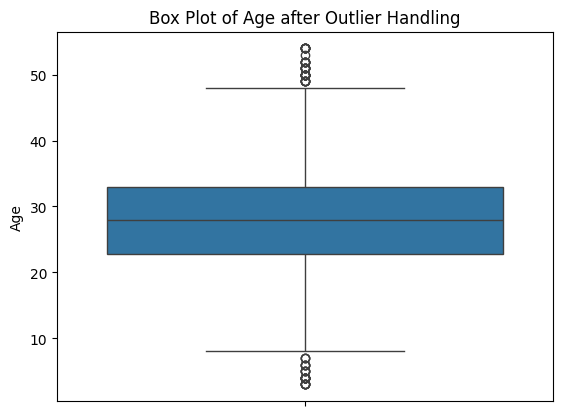

In [130]:
sns.boxplot(data=df['Age'])
plt.title('Box Plot of Age after Outlier Handling')
plt.show()

##***Detecting Duplicate data values***

In [131]:
# Backup the original df (data set)
df_copy = df.copy()

In [132]:
df.duplicated().sum()

np.int64(10)

In [133]:
df.duplicated(subset=['PassengerId']).sum()

np.int64(18)

In [134]:
df.duplicated(subset=['Name']).sum()

np.int64(17)

In [135]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
904,False
905,False
906,True
907,False


**Drop if there is duplicate**

In [136]:
df = df.drop_duplicates() #Remove all duplicate if there is
# df = df.drop_duplicates(subset=['PassengerId']) #Remove all duplicate if there is
# df = df.drop_duplicates(subset=['Name']) #Remove all duplicate if there is

In [137]:
df.duplicated().sum()

np.int64(0)

##***Correcting inconsistent data***

In [138]:
# Handling Inconsistencies in categorical columns
df['Sex'] = df['Sex'].str.lower().replace({'femalee':'female','mal':'male','Male':'male','Female':'female'})
df['Embarked']=df['Embarked'].replace({'Southmpton':'S','Queenstown':'Q','Cherbourg':'C','cherbourg':'C'})
df['Embarked'] = df['Embarked'].str.lower()

**Feature Engineering**

In [139]:
# Extracting Title from Name as new feature
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)

In [140]:
# --- Fix Pclass column if it contains strings like '1st', '2nd', '3rd ' ---
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)              # convert to numeric

In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,s,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,s,1.0


Encoding Techq

1.   **One Hot Encoding** : creating or dumpies in new columns : used for nominal categorical data columns
2.   **Label Encoding**: used for ordinal categorical data columns


In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
# Encode categorical features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

In [144]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,4,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,4,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,4,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,4,1.0


##***Data visualization - Understanding***

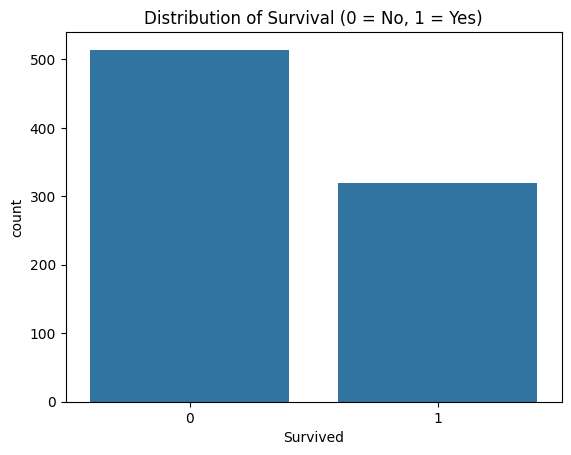

In [145]:
# Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title("Distribution of Survival (0 = No, 1 = Yes)")
plt.show()

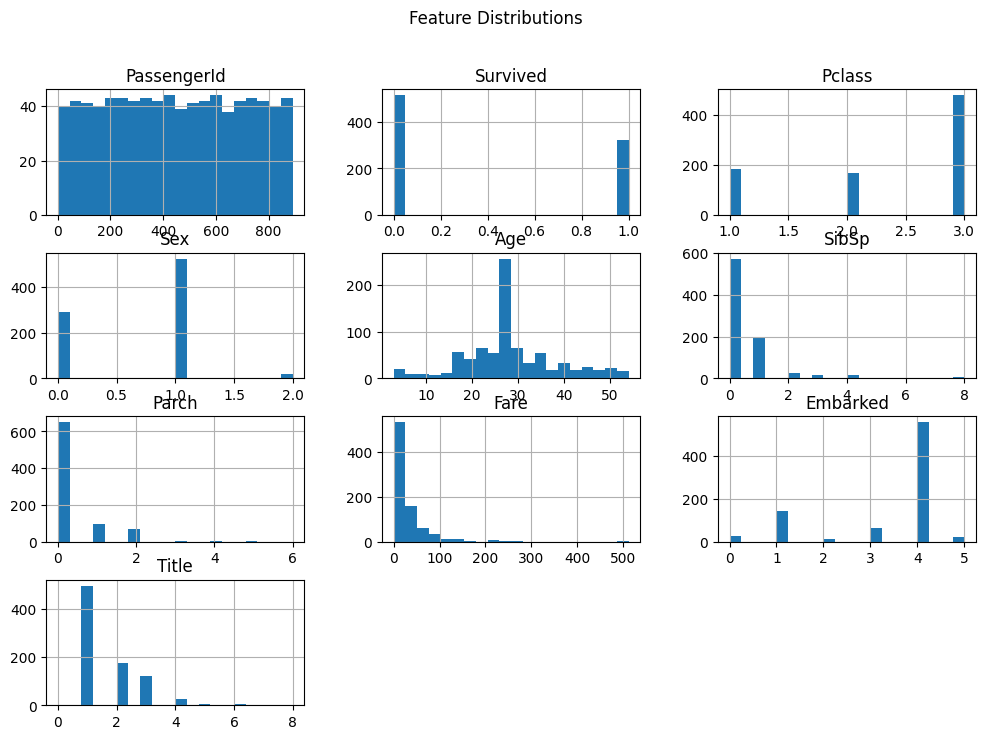

In [146]:
# Distribution of numerical columns
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

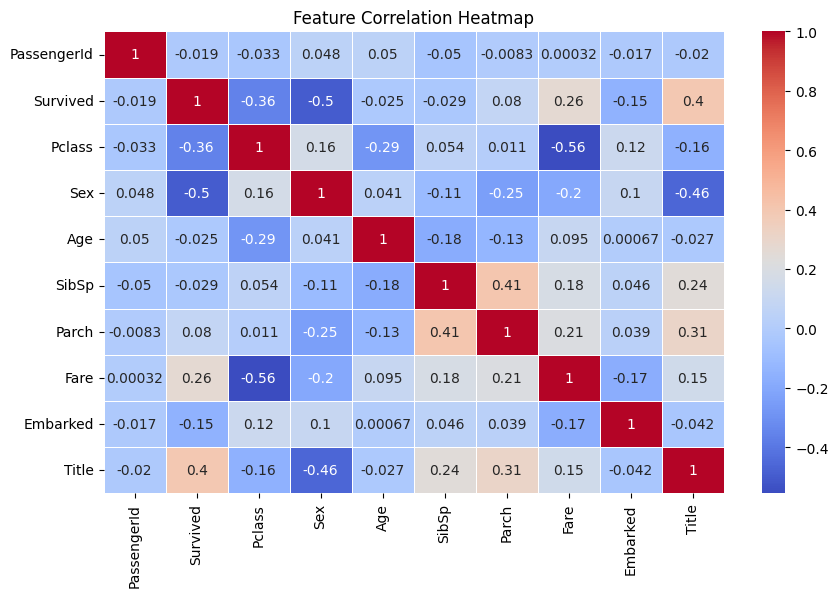

In [147]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

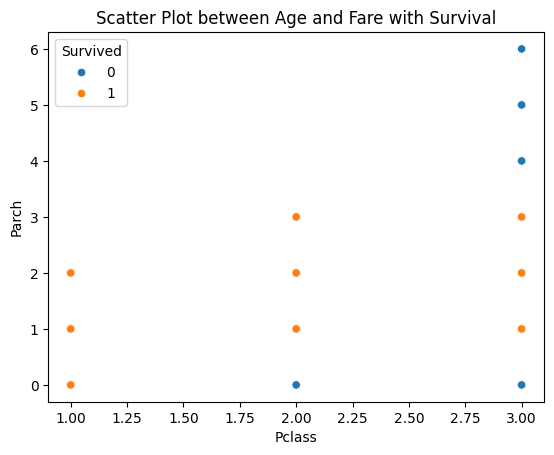

In [148]:
# Scatter between features (Age vs Fare)
sns.scatterplot(x='Pclass', y='Parch', hue='Survived', data=df)
plt.title("Scatter Plot between Age and Fare with Survival")
plt.show()

##***Feature selection***

In [149]:
# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

X = df[features]
y = df[target]

##**Data Splitting: 70% Train, 15% Validation, 15% Test**


In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (583, 7), Validation: (125, 7), Test: (126, 7)


In [152]:
from sklearn.preprocessing import StandardScaler

**Standardize features**

- Standaization : mean , std

- Normalization : rang 0 -1

- Robust Scalling IQR median

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

##**Model Training: K-Nearest Neighbors**


In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##**Prediction**

In [156]:
y_pred = knn.predict(X_test)

##**Model Evaluation and Metrics Interpretation**


In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [158]:
print("KNN Model Evaluation Metrics:")

KNN Model Evaluation Metrics:



Confusion Matrix:


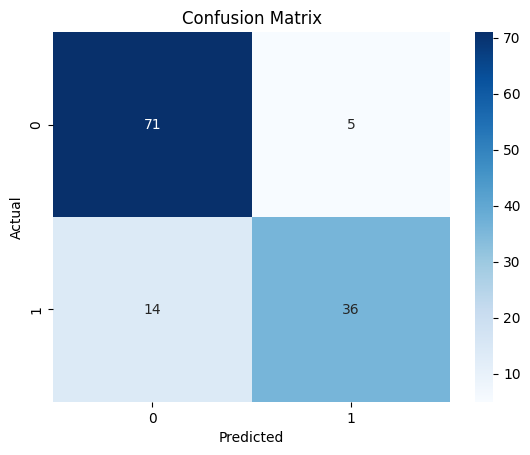

In [159]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [160]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.8492063492063492


In [161]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)

Precision: 0.8780487804878049


In [162]:
rec = recall_score(y_test, y_pred)
print("Recall (Sensitivity):",rec)

Recall (Sensitivity): 0.72


In [163]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

F1 Score: 0.7912087912087912


In [164]:
roc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:",roc)

ROC-AUC: 0.8271052631578947


In [165]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        76
           1       0.88      0.72      0.79        50

    accuracy                           0.85       126
   macro avg       0.86      0.83      0.84       126
weighted avg       0.85      0.85      0.85       126



##**`Data Preprocessing Steps that I impliment`**

**Handling Missing Values:**
I first identified missing values using `df.isnull().sum()`. Then, I dropped the *Cabin* column because it had a large number of missing entries — a reasonable approach when a column is mostly empty. For the *Age* and *Embarked* columns, I filled the missing values using the median and mode, respectively, which is a common strategy for numerical and categorical data. I also used **KNNImputer** to fill the missing values in the *Fare* column. This method imputes missing values based on the nearest neighbors’ values, providing a more sophisticated approach than simple mean, median, or mode imputation.

**Outlier Handling:**
I detected outliers in the *Age* column using the **Interquartile Range (IQR)** method. This technique defines outliers as values lying outside 1.5 times the IQR from the first and third quartiles. The rows containing these outliers were then removed from the DataFrame.

**Detecting and Dropping Duplicate Data:**
I checked for duplicate rows in the DataFrame using `df.duplicated().sum()`. I also verified duplicates based on *PassengerId* and *Name*. Finally, I removed all duplicate rows using `df.drop_duplicates()`.

**Correcting Inconsistent Data:**
I addressed inconsistencies in the *Sex* column by converting all entries to lowercase and correcting variations such as “Femalee” to “female.” I also cleaned the *Pclass* column by removing suffixes like “st,” “nd,” and “rd,” then converted the column to an integer type. Similarly, I standardized the *Embarked* column by replacing inconsistent entries with their standard abbreviations (“S,” “Q,” “C”) and converting all values to lowercase.

**Feature Engineering (Extracting Titles):**
I created a new feature called *Title* by extracting titles from the *Name* column. These titles were then mapped to numerical values, making them suitable for use in machine learning models.

**Encoding Categorical Features:**
I used **LabelEncoder** to convert categorical features such as *Sex* and *Embarked* into numerical representations. Label Encoding assigns a unique integer to each category, enabling algorithms to interpret these variables.

**Splitting Data:**
I split the dataset into training, validation, and testing sets using `train_test_split`. This step is crucial for assessing a machine learning model’s performance on unseen data.

**Standardizing Features:**
I applied **StandardScaler** to standardize the numerical features. Standardization scales the data to have a mean of 0 and a standard deviation of 1, which can significantly improve the performance of certain machine learning algorithms.



These preprocessing steps comprehensively address missing values, outliers, and inconsistent data. They also include feature engineering, encoding, and data preparation — ensuring the dataset is clean, consistent, and ready for effective model training and evaluation.

